In [10]:
import sys
sys.path.insert(0, "C:\\Users\\bradm\\Computational physics II\\Exam\\cfdadvection\\cfdadvection")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import advection as adv

### Steps to use the module:

Advection module:
* **.Grid1()** generates the 1D grid and initial set up: ng (gosths cells), nx (number of cells) and x limits.
* **.Simulation()** takes an object as input
* **initial_conditions()** will fill the first array of or grid with initial conditions using a "top hat" or "gaussian" profile.
* **time_loop()** will perform the operations iteratively up to max-time.

For the simple case of a top hat profile using the slope type "minmod":
- initialize **Grid1() if no x limits are given, they are set up to 0 and 1. A grid is created within the class.
- Then make the grid boundaries periodic by calling the function **fill_bcs()**
- We call **.Simulation()** providing the object return from **.Grid1()**, the cfl constant c, u, and the slope type which in this case we use "minmod". 
- We apply the initial conditions on the revious object by using **initial_conditions()** which acepts, "tophat" or "gaussian"
- Finally we loop over a t_max establish by defaut as the period * number of periods. This function will operate over the grid "a" that will store the results.

- Plot g.x (x axis) vs g.a (results) 

In [12]:
# We set the initial conditions.

xmin = 0.0
xmax = 1.0
nx = 256
ng = 2
u = 1.0



##### Unlimited #####
gu = adv.Grid1(ng, nx, xmin=xmin, xmax=xmax)
gu.fill_bcs()
su = adv.Simulation(gu, u, c = 0.8, slope_type="unlimited")
su.initial_conditions("tophat")
ainit = su.grid.a.copy()
su.time_loop(n_periods=5)

##### Minmod #####
gmi = adv.Grid1(ng, nx, xmin=xmin, xmax=xmax)
gmi.fill_bcs()
smi = adv.Simulation(gmi, u, c =0.8, slope_type="minmod")
smi.initial_conditions("tophat")
smi.time_loop(n_periods=5)



##### godunov #####
ggd = adv.Grid1(ng, nx, xmin=xmin, xmax=xmax)
ggd.fill_bcs()
sgd = adv.Simulation(ggd, u, c =0.8, slope_type="godunov")
sgd.initial_conditions("tophat")
sgd.time_loop(n_periods=5)


##### MC #####
gmc = adv.Grid1(ng, nx, xmin=xmin, xmax=xmax)
gmc.fill_bcs()
smc = adv.Simulation(gmc, u, c =0.8, slope_type="MC")
smc.initial_conditions("tophat")
smc.time_loop(n_periods=5)



##### superbee #####
gsb = adv.Grid1(ng, nx, xmin=xmin, xmax=xmax)
gsb.fill_bcs()
ssb = adv.Simulation(gsb, u, c =0.8, slope_type="superbee")
ssb.initial_conditions("tophat")
ssb.time_loop(n_periods=5)



##### varleer #####
gvl = adv.Grid1(ng, nx, xmin=xmin, xmax=xmax)
gvl.fill_bcs()
svl = adv.Simulation(gvl, u, c =0.8, slope_type="varleer")
svl.initial_conditions("tophat")
svl.time_loop(n_periods=5)



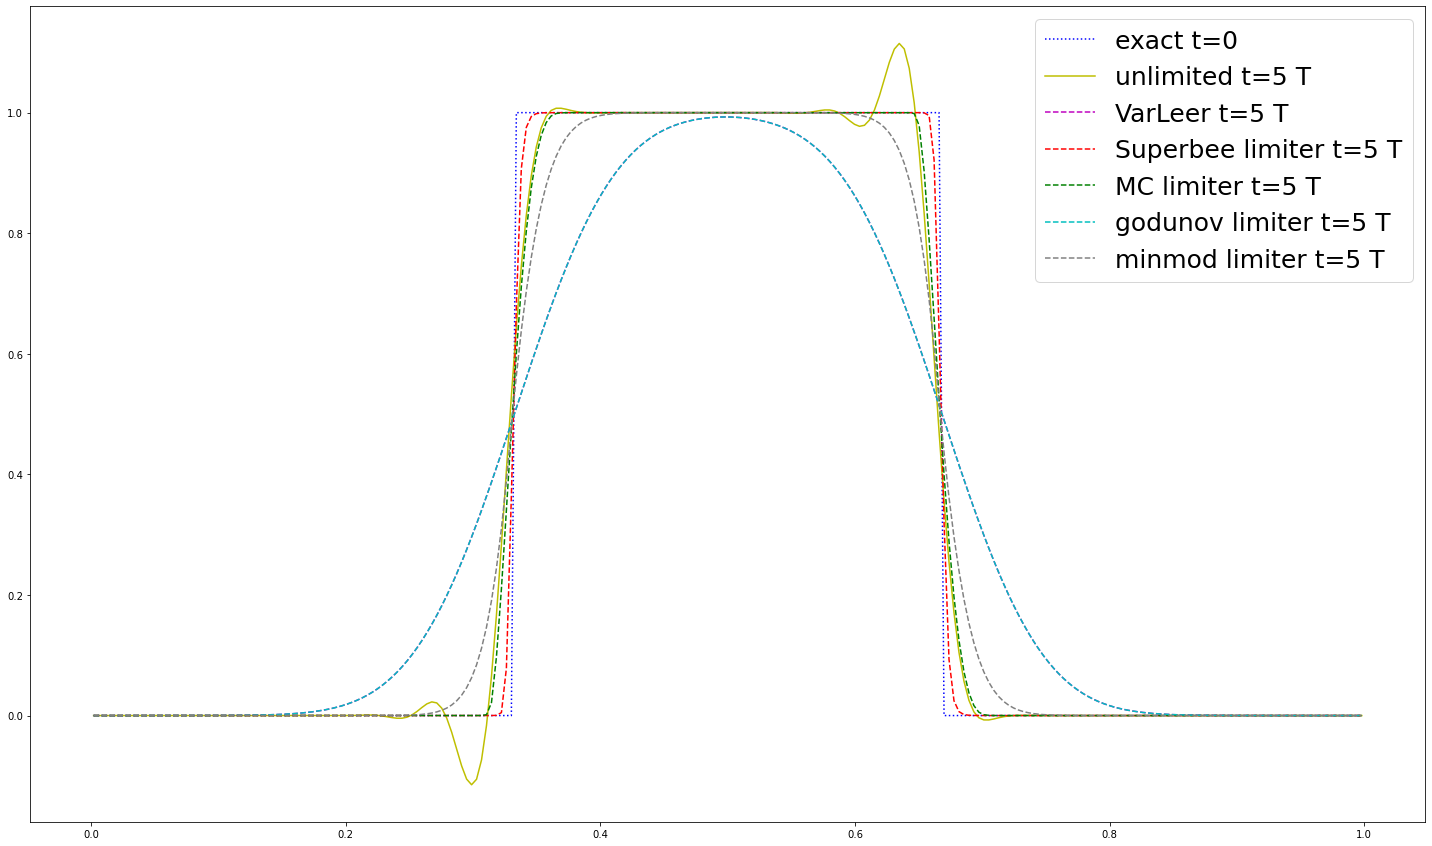

In [21]:
fig, ax = plt.subplots(figsize=(25,15))
#plt.figure(figsize=(25,15))

plt.plot(gu.x[gu.ilo:gu.ihi+1], ainit[gu.ilo:gu.ihi+1],
         ls=":", label="exact t=0", color = "b")

plt.plot(gu.x[gu.ilo:gu.ihi+1], gu.a[gu.ilo:gu.ihi+1],
         label="unlimited t=5 T", color = "y")

plt.plot(gu.x[gu.ilo:gu.ihi+1], gvl.a[gu.ilo:gu.ihi+1],
         ls="--",label="VarLeer t=5 T", color = "m")

plt.plot(gu.x[gu.ilo:gu.ihi+1], gsb.a[gu.ilo:gu.ihi+1],
         ls="--",label="Superbee limiter t=5 T",color = "r")

plt.plot(gu.x[gu.ilo:gu.ihi+1], gmc.a[gu.ilo:gu.ihi+1],
         ls="--",label="MC limiter t=5 T",color = "g")

plt.plot(gu.x[gu.ilo:gu.ihi+1], ggd.a[gu.ilo:gu.ihi+1],
         ls="--",label="godunov limiter t=5 T",color = "c")

plt.plot(gu.x[gu.ilo:gu.ihi+1], gmi.a[gu.ilo:gu.ihi+1],
         ls="--",label="minmod limiter t=5 T",color = "grey")


plt.legend(loc="best", fontsize = 25)


plt.savefig('outputfolder/limiters.png', bbox_inches='tight')